# Portfolio project 2: Life Expectancy and GDP project

This project will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

First, let's grab the data and check the first five rows in order to familiarize with them:

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


From `data.head()` we understand that we have 4 columns:

1. Country: `string` containing the name of the Country (each Country is mentioned more than once)
2. Year: `int` containing the Year of reference
3. Life expectancy at birth: `int` containing the years of life expectancy
4. GDP: (probably) `int` containing the GDP

There could be some problems with the column "Life expectancy at birth (years)" since this string has spaces and brakets that might cause errors while manipulating the DataFrame. 
Let's rename that column and further deepen our EDA (Exploratory Data Analysis):

In [37]:
data = data.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'})
data.describe(include='all')

,Country,Year,Life_expectancy,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


Now we know that:

1. We have a set of 96 rows
2. We have 6 unique Countries considered, thus for each Country there are data from 16 years
3. Indeed, years considered are from 2000 (min value) to 2015 (max value)

Looking at the stats, it seems that the dataframe is quite clean, without visible outliers. GDP std. dev. is quite high tough...we'll check it out if that could be some data problem or if that's correct.

## 1) Life expectancy vs GDP (for each country separately)

As first, let's make some plot to understand whether there is a link between GDP and life expectancy over time

**First series of plot**: line plot of GDP and life expectancy vs years (since those two variables have a very different range of values, we must plot them with double y-axis if we want them to be comparable)

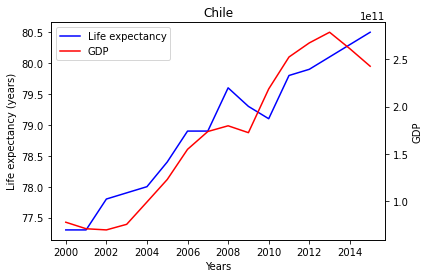

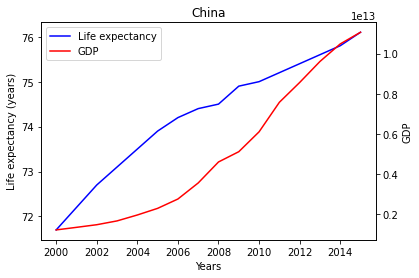

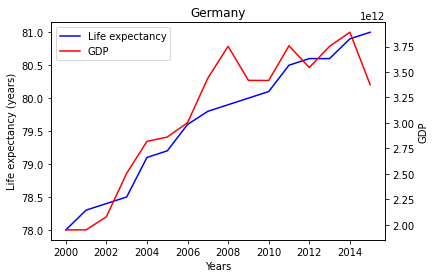

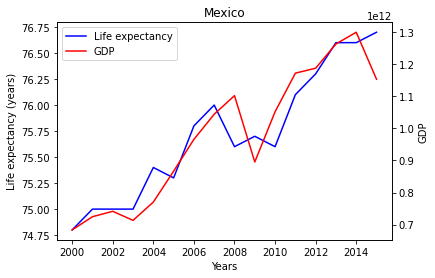

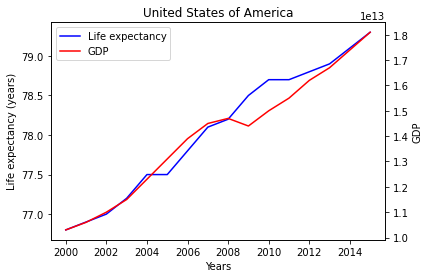

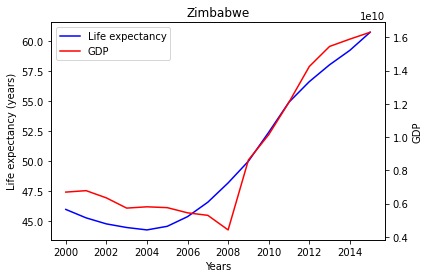

In [38]:
Country_list = data['Country'].unique()
x = data['Year'].unique()
for state in range(len(Country_list)):
    ax1 = plt.subplot()
    y1 = data[(data.Country == Country_list[state])].Life_expectancy
    l1 = ax1.plot(x, y1, color='blue', label='Life expectancy')
    ax2 = ax1.twinx()
    y2 = data[(data.Country == Country_list[state])].GDP
    l2 = ax2.plot(x,y2, color='red', label = 'GDP')
    plt.title(Country_list[state])
    lns = l1+l2
    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc=0)
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Life expectancy (years)')
    ax2.set_ylabel('GDP')
    plt.show()

Looking at those graphs, we can make the following observations:

- In the timespan 2000-2015, all Countries show a general growth of both Life expectancy and GDP, with 3 different patterns:

  1) Monotonic growth (constant growth with no decrease): Life expectancy for China, Germany and USA, GDP for China 
  
  2) Growth with internal temporary decrease: Life expectancy for Chile and Mexico, GDP for Chile, Germany, Mexico and USA 
  
  3) Initial decrease with a following growth: both Life expectancy and GDP for Zimbabwe


- Life expectancy and GDP seem to have quite an high correlation. Only China shows patterns not perfectly overlapped, with a growth of Life expectancy much faster than GDP

## 2) Life expectancy & GDP (comparison among countries)

Let's now compare separately the growth (both in absolute value and in % value) of Life expectancy and GDP for each Country considered

**Second series of plot**: line plot of life expectancy (of all countries) vs years and line plot of GDP (of all countries) vs years. Comparison is both with absolute data (upper graphs) and with normalized data (lower graphs).

_Normalization of data is done according to the following equation:_

$$ \left({y(i) \over y(1)}*100 \right) - y(1) $$

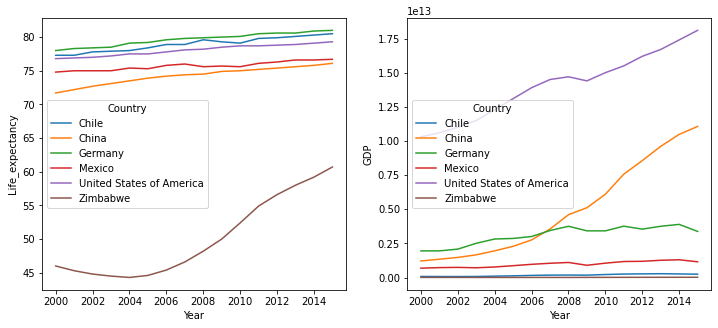

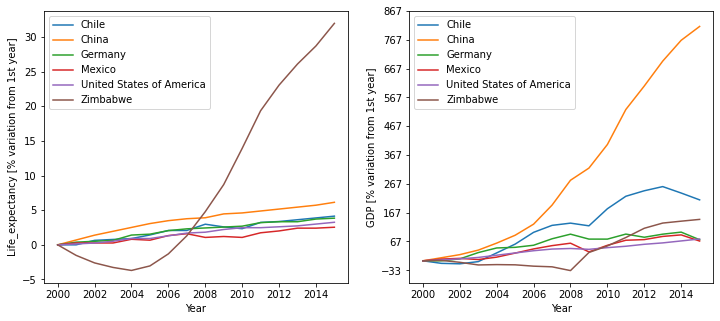

In [74]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(x='Year', y='Life_expectancy', hue='Country', data=data)
plt.subplot(1,2,2)
sns.lineplot(x='Year', y='GDP', hue='Country', data=data)
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
color_range=sns.color_palette()
counter=0
for state in range(len(Country_list)):
    y1_temp = data[(data.Country == Country_list[state])].Life_expectancy.reset_index(drop=True)
    y1 = [(y1_temp[i]/y1_temp[0]*100)-100 for i in range(len(y1_temp))]
    plt.plot(x, y1, color=color_range[counter], label=state)
    plt.legend(Country_list)
    counter += 1   
    plt.xlabel('Year')
    plt.ylabel('Life_expectancy [% variation from 1st year]')
plt.subplot(1,2,2)
counter=0
y_max=0
y_min=0
for state in range(len(Country_list)):
    y1_temp = data[(data.Country == Country_list[state])].GDP.reset_index(drop=True)
    y1 = [(y1_temp[i]/y1_temp[0]*100)-100 for i in range(len(y1_temp))]
    y_max_temp = max(y1)
    y_min_temp = min(y1)
    if y_max_temp > y_max:
        y_max = y_max_temp
    if y_min_temp < y_min:
        y_min = y_min_temp
    plt.plot(x, y1, color=color_range[counter], label=state)
    plt.legend(Country_list)
    counter += 1
    plt.yticks(range(int(y_min),int(y_max)+100,100))
    plt.xlabel('Year')
    plt.ylabel('GDP [% variation from 1st year]')
plt.show()


**Observations about life expectancy:**

- Zimbabwe is the only Country showing a negative life expectancy trend, in years 2000-2004. That's probably due to the jump in death rates (25 per 1000 in 2002/2003) caused by poor medical facilities ([See here for more details](https://en.wikipedia.org/wiki/Demographics_of_Zimbabwe)).
- Despite its initial negative trend, Zimbabwe is also the Country that shows the highest percent growth in life expectancy (timespan 2004-2015).
- Other countries show a more or less similar percent growth in life expectancy of about 3%, with China being the only one able to reach 5%.
- Zimbabwe and China, the countries with the higher percent growth in life expecatncy, are also the ones with the lowest absolute values. This confirms that countries with already an high value of life expectancy have less margin of improvement compared the ones with lower absolute life expectancies.
- Mexico shows almost no life expectancy growth, despite not being one of the countries with the highest absolute value. This means that Mexico is not working enough in improving life conditions, general welfare and medical facilities.

**Observations about GDP:**

- USA have a GDP at least an order of magnitude higher than any other country considered (__three orders of magnitude__ more than Zimbabwe). Only China reached 10<sup>13</sup> (same order of magnitude of USA) in 2015.
- As for life expectancy, Zimbabwe is the only country showing a negative trend (between 2000 and 2008). This is probably due to the fact that from 2000 to 2009 the economy experienced decline and hyperinflation before rebounding after the use of currencies other than the Zimbabwean dollar was permitted ([See here for more details](https://en.wikipedia.org/wiki/Zimbabwe#Demographics)).
- China is by far the country with the highest percent growth in GDP during 2000-2015 period (__almost 900%__ in 16 years), passing german GDP in 2007 and heading towards USA GDP. This incredible growth is probably an effect of amendments proposed in 10th, 11th and 12th Five-years plans of China, as described [here](https://en.wikipedia.org/wiki/Five-year_plans_of_China#Tenth_Plan_(2001–2005))
- Despite being very different in percent evaluation, USA and China GDP growth are very "similar" in absolute value, with a difference of *only* 0.2 * 10<sup>13</sup> in GDP excursion in favour of China (as shown below). For USA, the percent variation is smaller because the starting point was already high.

In [97]:
GDP_china=data[data.Country=='China'].GDP.reset_index(drop=True)
print('China GDP excursion between 2000 and 2015: ' + str(GDP_china[15] - GDP_china[0]))

GDP_usa=data[data.Country=='United States of America'].GDP.reset_index(drop=True)
print('USA GDP excursion between 2000 and 2015: ' + str(GDP_usa[15] - GDP_usa[0]))

China GDP excursion between 2000 and 2015: 9853350000000.0
USA GDP excursion between 2000 and 2015: 7800000000000.0


- Finally, Mexico is the country with the lowest percent increase in GDP, followed by Germany and Chile (whose GDP is the lowest apart from Zimbabwe). USA must not considered here, since the percent variation of GDP in that case is massively biased by the very high initial value (compared to other countries).

## 3) Life expectancy vs GDP: global representation

Finally, let's use a scatter plot to make a global recapitulatory visualization of the relationship between life expectancy and GDP both inter and intra countries.

**Thirs series of plot**: scatter plot of life expectancy (x-axis) vs GDP (y-axis) for every year (hue) and for every country (marker style).

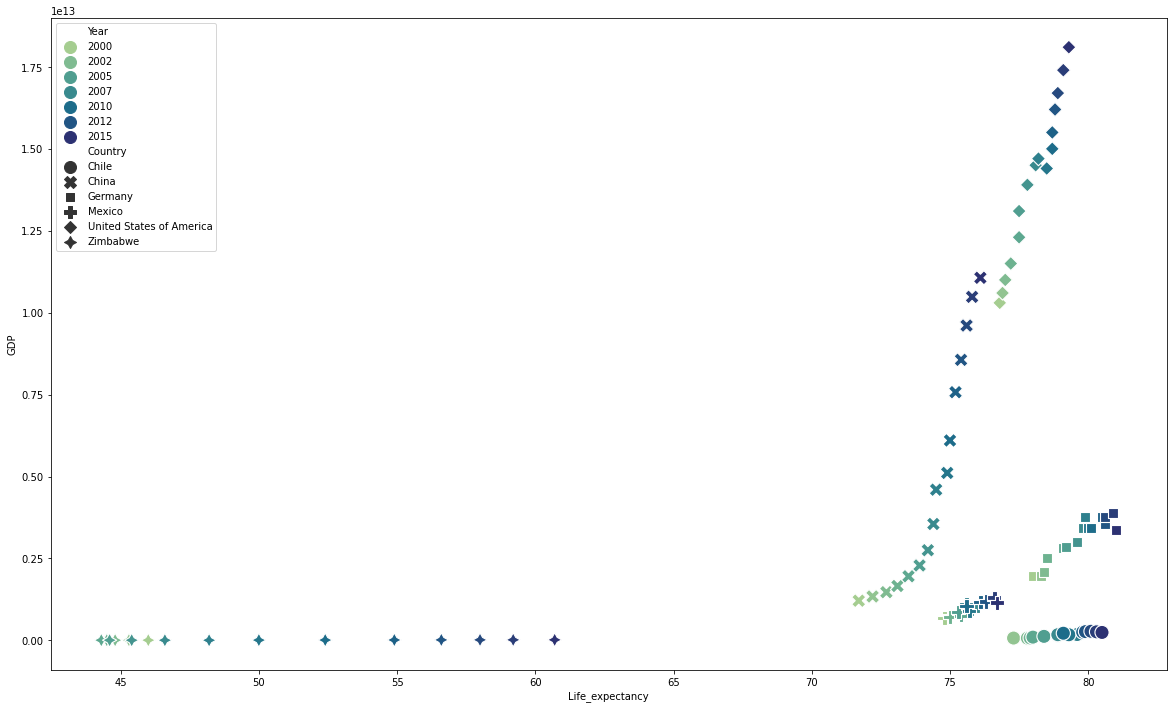

In [100]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='Life_expectancy',y='GDP',hue='Year',style='Country',data=data, s=200, palette='crest')
plt.legend(loc='upper left',markerscale=2)
plt.show()

Several of previous observations appear very clear in this one graph:

- General increase of both life expectancy and GDP for every country considered, apart from GDP of Zimbabwe and Chile (not evaluable in this graph)
- Zimbabwe awesome growth in life expectancy, still incredibly lower than life expectancy of any other country (looking at the hues, you can spot also an initial negative trend)
- negligible GDP of Zimbabwe and Chile, compared to USA GDP.
- Chinese growth in GDP, reaching the same order of magnitude of USA GDP
- Low development of both life expectancy and GDP in Mexico (points are very agglomerated)

## Conclusions

Considering every observation stated above, we can conclude that life expectancy and GDP are clearly correlated, both in a positive trend for each country analyzed.

Furthermore, Zimbabwe and China show the best improvement for life expectancy and GDP respectively. Those substantial growths are for sure dependent on the low starting points of the respective variable (indeed, countries with higher starting values, especially for life expectancy, can't expect high percent growths). Nevertheless, those developments are definitely an index of efforts in managing the welfare and the productivity of the country.

On the contrary, Mexico shows stagnant values of both life expectancy and GDP, showing this way a bad management from its political class.